In [1]:
import sys
sys.path.append('C:\Users\J-C\OneDrive\ODDocs\+PhD\Programming\Local\LPPLS')
sys.path.append('C:\Users\J-C\OneDrive\ODDocs\+PhD\Programming\Github\AllFunctions')

import pylppl as lp
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpld3
# mpld3.enable_notebook()
# import data_functions as dfn
import sloppy_func as slf

# from sklearn.cluster import KMeans
# import portfolio_functions as pf
# from sklearn.datasets import make_blobs
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score



no talib


In [2]:
data = pd.read_hdf('C:\Users\J-C\OneDrive\ODDocs\+PhD\Programming\Local\LPPLS\N_stocks_1990_2015.h5','res')

In [3]:
Y1 = data[data.columns[100]]

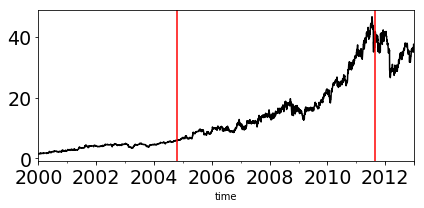

In [4]:
Y1['2000-01-01':'2013-01-01'].plot(color='k', figsize=(6,3))
dtmax = 2500
t2 = '2011-08-20' # approx 1 month after first crash
plt.axvline(t2,color='r')
plt.axvline(pd.Timestamp(t2) - dtmax * pd.Timedelta('1D'),color='r')
plt.tight_layout()
plt.show()

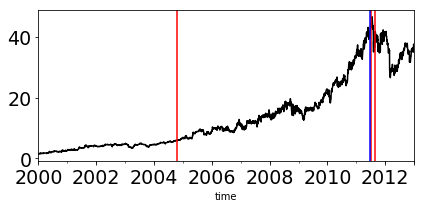

In [5]:
Y1['2000-01-01':'2013-01-01'].plot(color='k', figsize=(6,3))
dtmax = 2500
t2 = '2011-08-20' # approx 1 month after first crash

res_single=lp.fit_series(Y1,t2,dtmax)

plt.axvline(t2,color='r')
plt.axvline('2011-07-01',color='r')
plt.axvline(pd.Timestamp(t2) + res_single.loc[t2,'tc'] * pd.Timedelta('1D'),color='b')
plt.axvline(pd.Timestamp(t2) - dtmax * pd.Timedelta('1D'),color='r')
plt.tight_layout()
plt.show()


## Multifit

In [6]:
%%time 
res = pd.DataFrame()
dtmax=2500
n=25 # number of spacings
dt_range = np.linspace(30, dtmax, n)
j=1.0
for dt in dt_range:
    resdt=lp.fit_series(Y1,t2,dt) # non-log P-t series
    res = pd.concat([res,resdt], axis = 0) 
    print '\r', 'Progress: ', np.round(j/len(dt_range),4)*100,'%',
    j+=1

C:\Users\J-C\OneDrive\ODDocs\+PhD\Programming\Local\LPPLS\pylppl_model.py:95: RuntimeWarning: overflow encountered in multiply
  [0, np.sum(g * g), np.sum(g * f1), np.sum(g * f2)],
C:\Users\J-C\OneDrive\ODDocs\+PhD\Programming\Local\LPPLS\pylppl_model.py:96: RuntimeWarning: overflow encountered in multiply
  [0, 0, np.sum(f1 * f1), np.sum(f1 * f2)],
C:\Users\J-C\OneDrive\ODDocs\+PhD\Programming\Local\LPPLS\pylppl_model.py:97: RuntimeWarning: overflow encountered in multiply
  [0, 0, 0, np.sum(f2 * f2)]])
C:\Users\J-C\OneDrive\ODDocs\+PhD\Programming\Local\LPPLS\pylppl_model.py:85: RuntimeWarning: overflow encountered in power
  g = np.power(np.abs(tc - t), m)


Progress:  4.0 %

C:\Users\J-C\OneDrive\ODDocs\+PhD\Programming\Local\LPPLS\pylppl_model.py:83: RuntimeWarning: divide by zero encountered in log
  arg = w * np.log(np.abs(tc - t))
C:\Users\J-C\OneDrive\ODDocs\+PhD\Programming\Local\LPPLS\pylppl_model.py:86: RuntimeWarning: invalid value encountered in cos
  f1 = g * np.cos(arg)
C:\Users\J-C\OneDrive\ODDocs\+PhD\Programming\Local\LPPLS\pylppl_model.py:87: RuntimeWarning: invalid value encountered in sin
  f2 = g * np.sin(arg)


Progress:  76.0 %                

C:\Users\J-C\OneDrive\ODDocs\+PhD\Programming\Local\LPPLS\pylppl_model.py:55: RuntimeWarning: overflow encountered in double_scalars
  return math.sqrt(C1 ** 2 + C2 ** 2), math.atan2(C2, C1)


Progress:  100.0 %Wall time: 1min 55s



In [7]:
# FILTER RESULTS
results=pd.DataFrame()
results=lp.filter_LPPL(res,basic=True,w=[6,13],ctime=[-0.5,0.5]) 
print results

                   tc         m         w         A         B        C1  \
2011-08-20 -46.126882  0.911645  6.231752  3.771408 -0.002388  0.000065   
2011-08-20 -42.742998  0.816627  7.911990  3.791314 -0.004283 -0.000006   
2011-08-20 -47.053101  0.804078  7.353443  3.792426 -0.004682  0.000086   
2011-08-20 -49.183140  0.718558  7.331356  3.816144 -0.008196  0.000422   
2011-08-20 -50.568993  0.639110  7.015876  3.841341 -0.013796  0.001027   
2011-08-20 -50.430498  0.646133  7.068362  3.837950 -0.013145  0.001387   
2011-08-20 -51.441273  0.628365  6.943203  3.848144 -0.014905  0.000253   
2011-08-20 -52.684044  0.585588  6.630463  3.873489 -0.020196 -0.002214   
2011-08-20 -52.612591  0.567906  6.553022  3.886472 -0.022972 -0.001741   
2011-08-20 -52.375898  0.556843  6.488894  3.894946 -0.024900 -0.000944   
2011-08-20 -52.869914  0.515748  6.473727  3.930492 -0.033821 -0.000795   
2011-08-20 -55.409103  0.501240  6.571472  3.942326 -0.037733 -0.002362   

                  C2    

Most probable tc (tc_mp):  2011-06-29
pdf(tc_mp):  0.110998459736
Probabilty of tc in I=[ 2011-06-19 2011-07-09 ]: 
0.966555448978


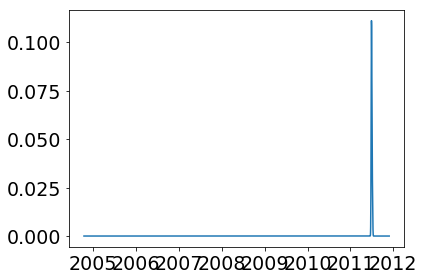

In [110]:
# Estimate pdf(tc) from sweeping window fit

# isolate t2s
tc=results.loc[t2,'tc']
tc=tc.as_matrix()

# estimate pdf wiht gaussian kernel
Kernel=sp.stats.gaussian_kde(tc) # object
probs=Kernel.evaluate(tc)

# PLOTTING
# from t1 - t2+100 or tc+100
tcmax=max(tc)
t1=pd.Timestamp(t2) - dtmax * pd.Timedelta('1D')
t2p=pd.Timestamp(t2) + (max(int(tcmax),0) + 99) * pd.Timedelta('1D')     # t2p=100 for tcmax<0, t2p=tcmax+100 for tcmax>=0
daterange=pd.date_range(t1,t2p)
# calculate pdf "daily"
pdf=Kernel.evaluate(range(-dtmax,max(0,int(tcmax)) + 100))
pdftime=pd.Series(pdf,daterange)

# find most probable tc
ix=np.argmax(pdf) # index of t* -> p(t*)=pmax
tc_mp=pd.Timestamp(t2)+(ix-dtmax)*pd.Timedelta('1D')
print 'Most probable tc (tc_mp): ',tc_mp.date()
print 'pdf(tc_mp): ', pdftime[tc_mp]

# calculate probability of tc being in the interval I=[tc-Dt,tc+Dt]
Dt=10
lb=tc_mp - Dt * pd.Timedelta('1D')
hb=tc_mp + Dt * pd.Timedelta('1D')
print 'Probabilty of tc in I=[',lb.date(),hb.date(),']: '
low=-1*(pd.Timestamp(t2)-lb) / np.timedelta64(1, 'D')
high=-1*(pd.Timestamp(t2)-hb) / np.timedelta64(1, 'D')
p=Kernel.integrate_box_1d(low,high) # sum(pdf[i-Dt:i+Dt]) # discrete
print p

# plt.plot(rest2,probs)
plt.plot(daterange,pdf)
plt.tight_layout()
plt.show() 